Explore correlations between variables such as rating and cost, distance and delivery time, etc., to uncover potential relationships. 

What will affect the Ratings? 

- delivery cost
- delivery time


In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
sb.set() # set the default Seaborn style for graphics
import seaborn as sns

In [2]:
data = pd.read_csv('./Datasets/Cleaned Grab SG Restaurants.csv')
data.head()

,name,address,cuisine,delivery_cost,lat,lon,opening_hours,radius,rating,reviews_nr,delivery_options,promo,loc_type,delivery_by,delivery_time,total opening time hours
0,Texas Chicken,Texas Chicken - VivoCity,"[""Western"", ""Fast Food"", ""Halal"", ""Chicken"", ""...",570.0,1.264792,103.822103,"{""open"": true, ""displayedHours"": ""10:30-21:30""...",5000,3.8,1591.0,ONLY_DELIVERY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,43.0,75.75
1,Subway,Subway - Vivocity,"[""Healthy"", ""Sandwiches"", ""Fast Food"", ""Halal""...",570.0,1.264741,103.822072,"{""open"": true, ""displayedHours"": ""12:00-19:00""...",3000,4.2,197.0,ONLY_DELIVERY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,42.0,49.00
2,LiHO Tea,LiHO Tea - Vivo City,"[""Same Prices In-Store"", ""Beverages"", ""Local"",...",560.0,1.264309,103.821369,"{""open"": true, ""displayedHours"": ""11:30-20:45""...",5000,4.5,353.0,DELIVERY_TAKEAWAY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,41.0,64.75
3,Wingstop,Wingstop - VivoCity,"[""Halal"", ""Chicken"", ""Fast Food"", ""Burger"", ""W...",560.0,1.263527,103.821712,"{""open"": true, ""displayedHours"": ""11:00-21:00""...",5000,4.4,1391.0,ONLY_DELIVERY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,45.0,70.00
4,Le Shrimp Ramen,Le Shrimp Ramen - Vivocity,"[""Japanese"", ""Ramen"", ""Noodles"", ""Asian""]",570.0,1.264810,103.822554,"{""open"": true, ""displayedHours"": ""10:30-21:00""...",5000,4.6,309.0,DELIVERY_TAKEAWAY,Use 'TEATIME' for FREE delivery between 3PM to...,FOOD,GRAB,44.0,73.50


<!-- ## separate those with available promo with & without -->

## ratings vs delivery cost

In [15]:
rating = pd.DataFrame(data['rating'])
delivery_cost = pd.DataFrame(data['delivery_cost'])

jointDF = pd.concat([delivery_cost, rating], axis = 1).reindex(delivery_cost.index)
jointDF

jointDF.dropna(inplace=True)  #remove null rows
cleaned_jointDF = jointDF.dropna()
cleaned_jointDF

,delivery_cost,rating
0,570.0,3.8
1,570.0,4.2
2,560.0,4.5
3,560.0,4.4
4,570.0,4.6
...,...,...
16110,290.0,4.4
16111,500.0,4.7
16115,330.0,4.2
16128,620.0,3.6


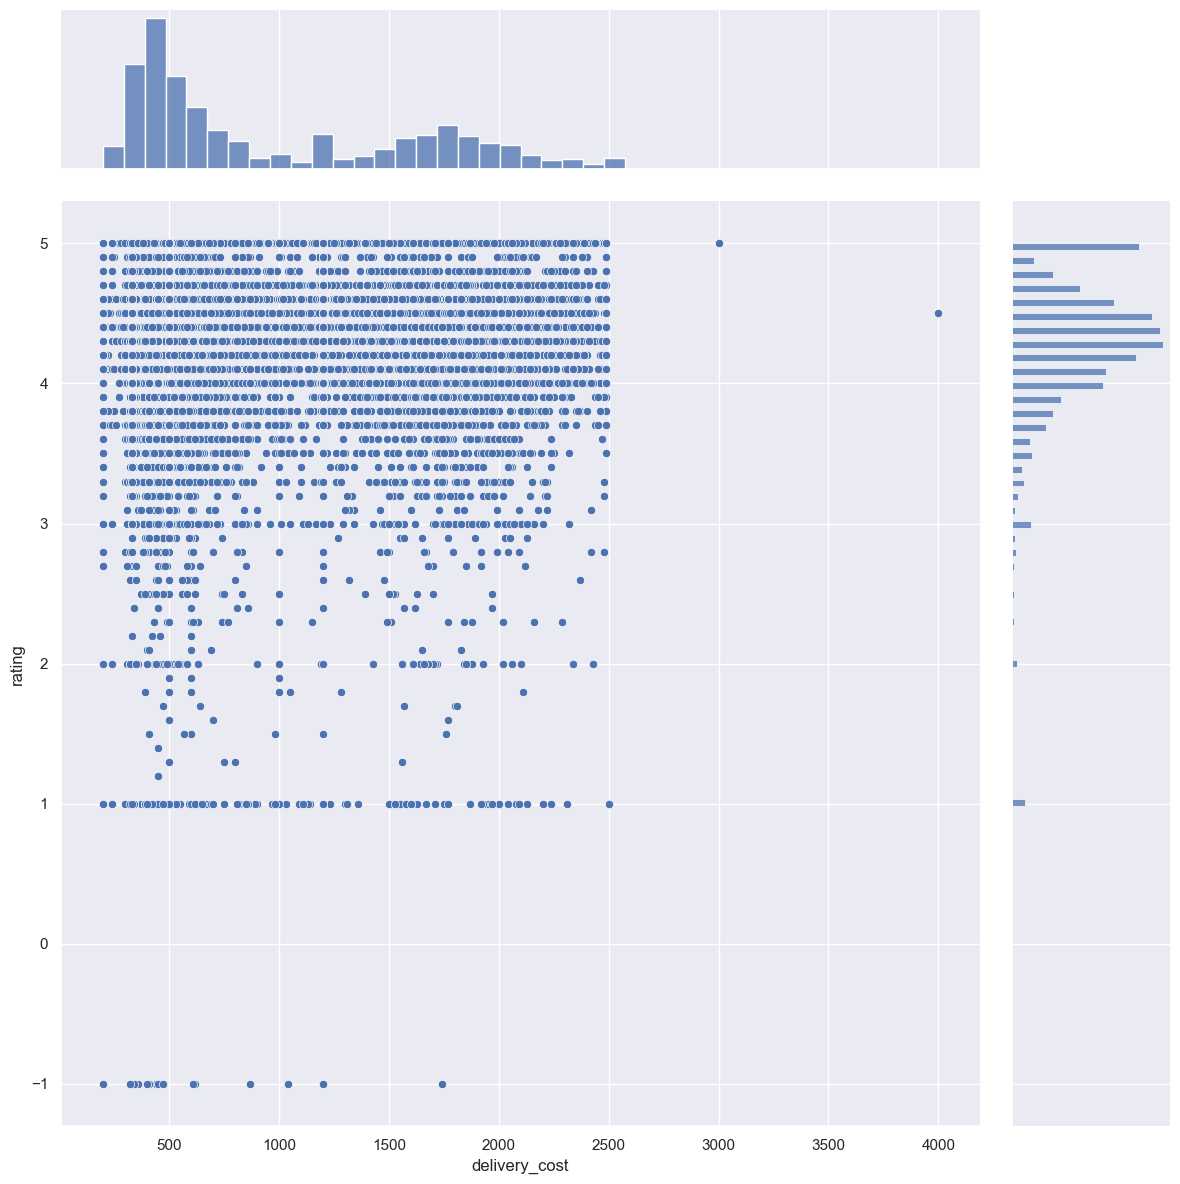

In [4]:
sb.jointplot(data = cleaned_jointDF, x = "delivery_cost", y = "rating", height = 12)

In [17]:
# cleaned_jointDF.corr()
correlation = cleaned_jointDF['rating'].corr(cleaned_jointDF['delivery_cost'])
print("Correlation coefficient:", correlation)

Correlation coefficient: -5.742286107848795e-05


## ratings vs delivery time 

In [6]:
rating = pd.DataFrame(data['rating'])
delivery_time = pd.DataFrame(data['delivery_time'])

jointDF = pd.concat([delivery_time, rating], axis = 1).reindex(delivery_time.index)
jointDF

jointDF.dropna(inplace=True)  #remove null rows
cleaned_jointDF = jointDF.dropna()
cleaned_jointDF

,delivery_time,rating
0,43.0,3.8
1,42.0,4.2
2,41.0,4.5
3,45.0,4.4
4,44.0,4.6
...,...,...
16129,23.0,4.2
16131,26.0,5.0
16133,26.0,3.9
16134,30.0,3.6


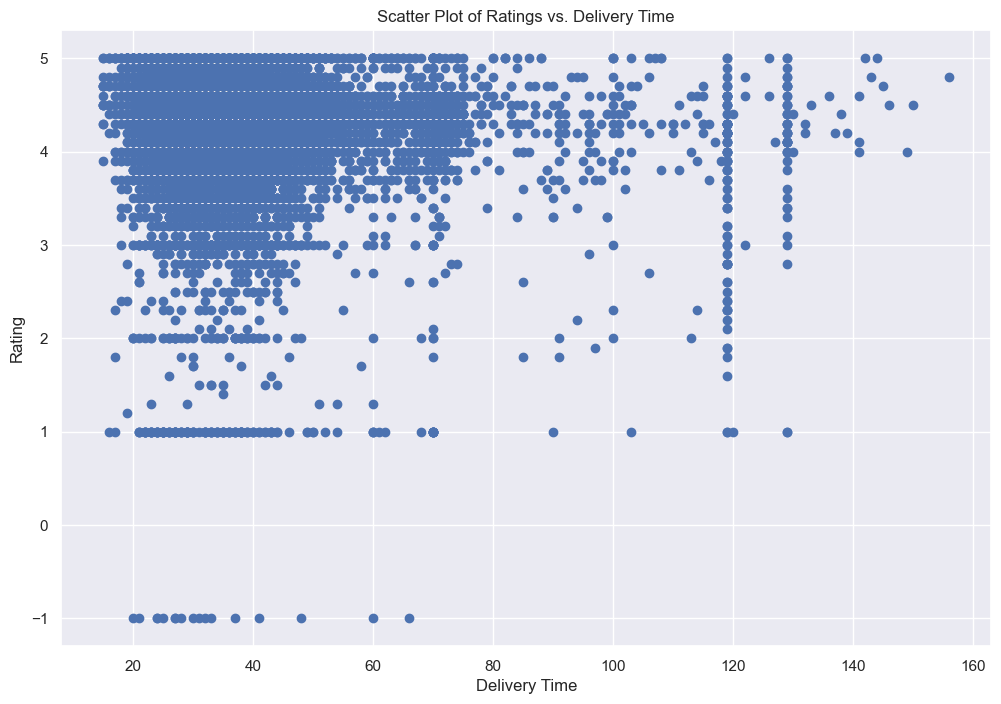

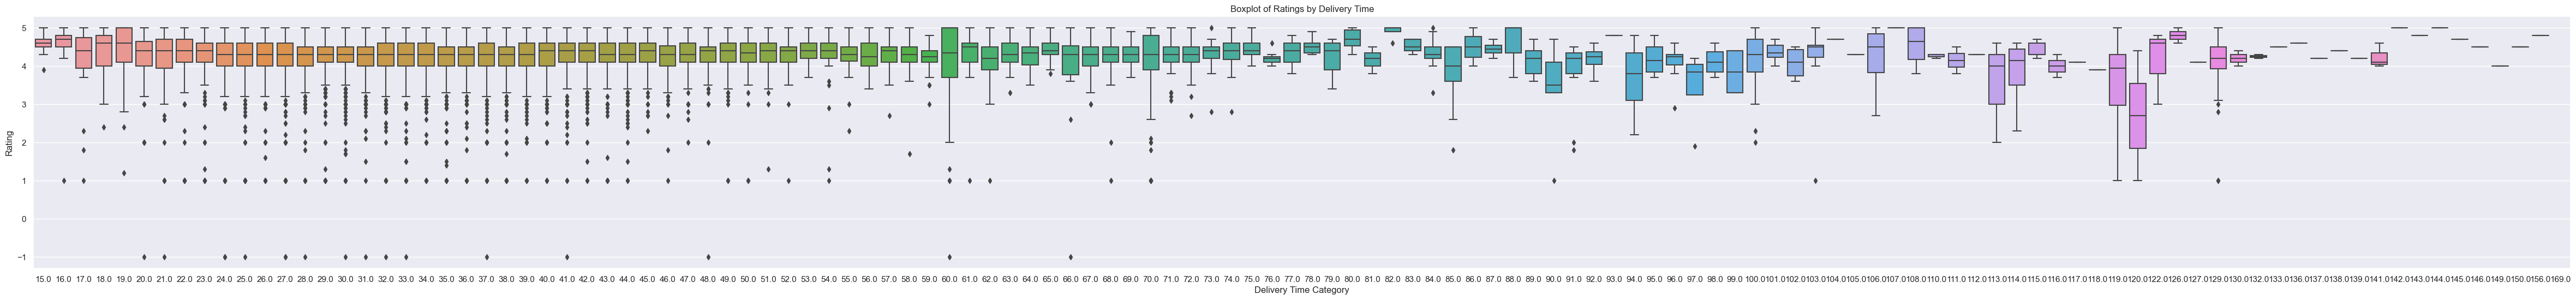

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(cleaned_jointDF['delivery_time'], cleaned_jointDF['rating'])
plt.xlabel('Delivery Time')
plt.ylabel('Rating')
plt.title('Scatter Plot of Ratings vs. Delivery Time')
plt.show()

# Boxplot
plt.figure(figsize=(60, 6))
sns.boxplot(x='delivery_time', y='rating', data=data)
plt.xlabel('Delivery Time Category')
plt.ylabel('Rating')
plt.title('Boxplot of Ratings by Delivery Time')
plt.show()


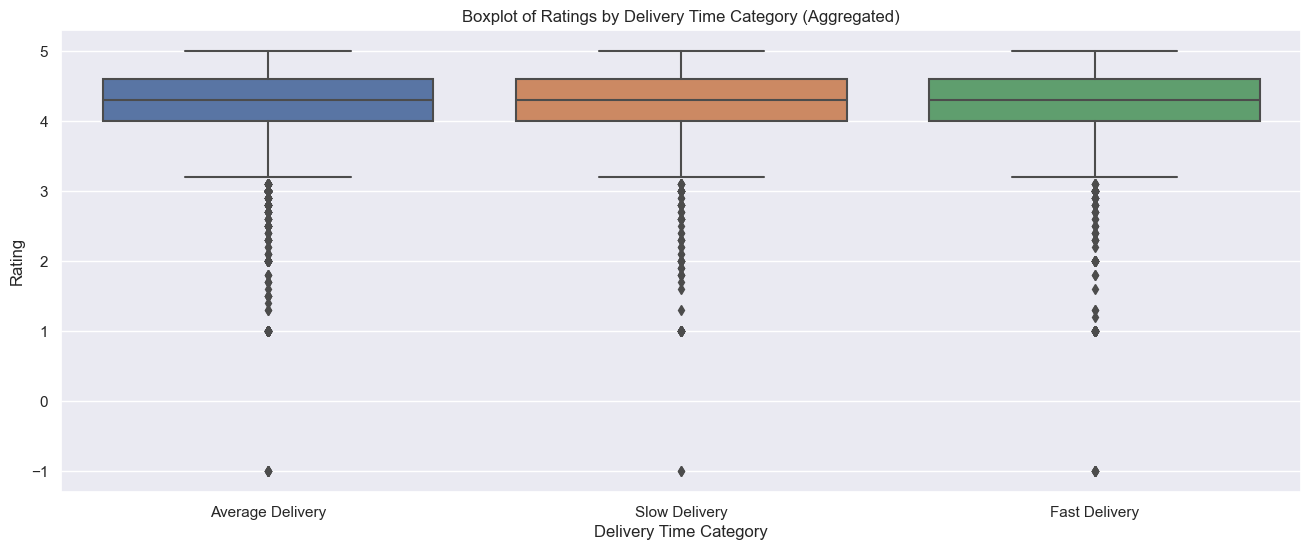

In [12]:
import numpy as np

# Define the function to categorize delivery times into broader categories
def categorize_delivery_time(delivery_time):
    if delivery_time < 30:
        return "Fast Delivery"
    elif 30 <= delivery_time < 60:
        return "Average Delivery"
    else:
        return "Slow Delivery"

# Apply the categorization function to create a new column 'delivery_time_category'
cleaned_jointDF['delivery_time'] = cleaned_jointDF['delivery_time'].apply(categorize_delivery_time)

# Plot the boxplot using the aggregated delivery time categories
plt.figure(figsize=(16, 6))
sns.boxplot(x='delivery_time', y='rating', data=data)
plt.xlabel('Delivery Time Category')
plt.ylabel('Rating')
plt.title('Boxplot of Ratings by Delivery Time Category (Aggregated)')
plt.show()


In [13]:
# Group the data by delivery time category and calculate statistics
delivery_time_stats = cleaned_jointDF.groupby('delivery_time')['rating'].agg(['mean', 'median', 'std', 'min', 'max'])

# Print the statistics
print(delivery_time_stats)


                      mean  median       std  min  max
delivery_time                                         
Average Delivery  4.247456     4.3  0.574203 -1.0  5.0
Fast Delivery     4.233795     4.3  0.665523 -1.0  5.0
Slow Delivery     4.134524     4.3  0.784000 -1.0  5.0


In [10]:
correlation = cleaned_jointDF['rating'].corr(cleaned_jointDF['delivery_time'])
print("Correlation coefficient:", correlation)

Correlation coefficient: -0.03872272201976685


### Since the correlation coefficient is very close to 0 (-0.0387), it suggests that there is almost no linear relationship between delivery time and ratings.

Coefficients 	:  [-0.001721]
Intercept 	:  4.300808539893486


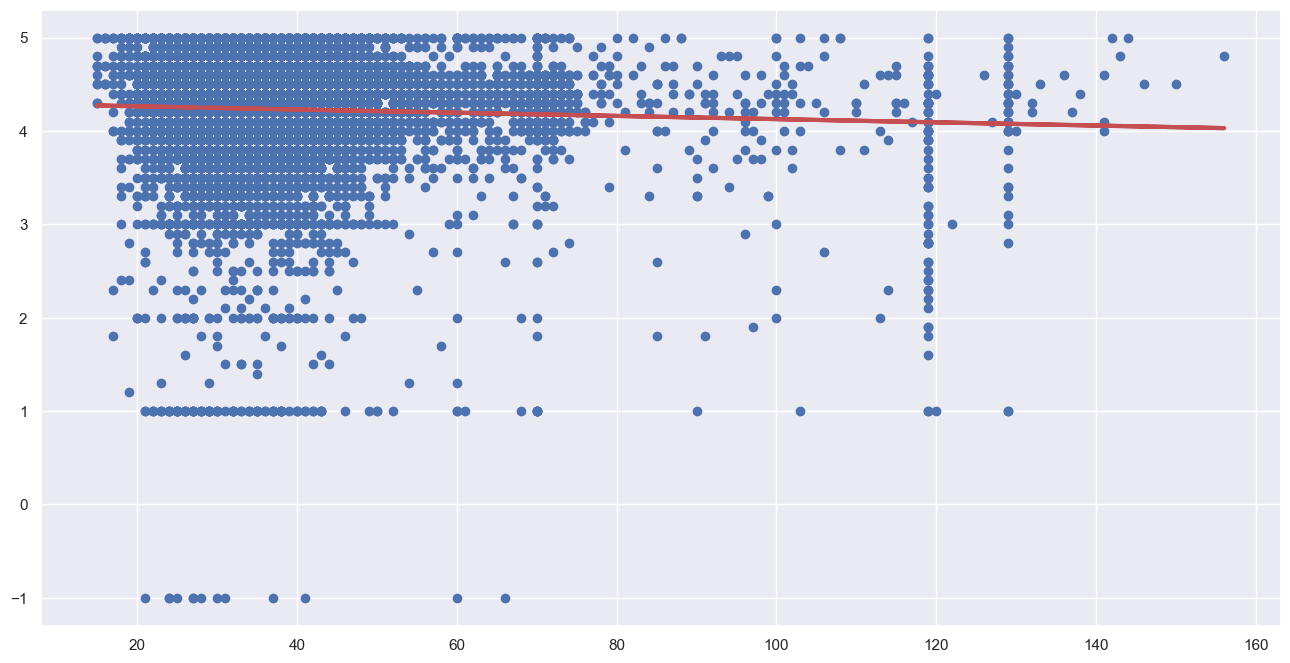

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Splitting the data into training and testing sets
train_set, test_set = train_test_split(cleaned_jointDF, test_size=0.2, random_state=45)

# Allocate the variables
delivery_time_train = train_set[['delivery_time']]
rating_train = train_set['rating']
delivery_time_test = test_set[['delivery_time']]
rating_test = test_set['rating']

# Fit a linear regression model on the train set
linreg = LinearRegression()
linreg.fit(delivery_time_train, rating_train)

# Predict ratings using delivery cost train and test data
rating_train_pred = linreg.predict(delivery_time_train)
rating_test_pred = linreg.predict(delivery_time_test)

# Coefficients of the model
print('Coefficients \t: ', linreg.coef_)
print('Intercept \t: ', linreg.intercept_)

# Plot the regression line
regline_x = delivery_time_train
regline_y = linreg.predict(delivery_time_train)

# Scatter plot and regression line plot
f, axes = plt.subplots(1, 1, figsize=(16, 8))
axes.scatter(delivery_time_train, rating_train)
axes.plot(regline_x, regline_y, 'r-', linewidth=3)
plt.show()